# CS5481 - Tutorial 10
## Social Network and Anomaly Detection

In this tutorial, you will learn how to represent a graph, compute some important graph attributions with networkx and do anomaly detection with pyod

## preparation
- Python
- Python Libraries
  - numpy
  - networkx
  - matplotlib
  - pandas
  - pyod
  - seaborn
  - scikit-learn
  - warnings

# Context
1. Create a Graph and obtain its attributions with networkx
2. Anomaly Detection
3. Practice

# 1.Create a Graph and obtain its attributions with Networkx

In [31]:
!pip install networkx

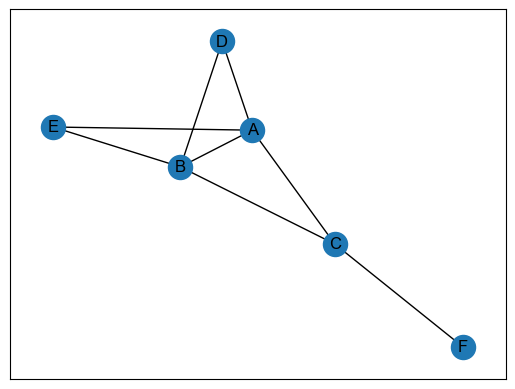

Nodes： ['A', 'B', 'C', 'D', 'E', 'F']
Edges： [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F')]
Number of Edges： 8
Adjacency Matrix of G1:  <Compressed Sparse Row sparse array of dtype 'int64'
	with 16 stored elements and shape (6, 6)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (2, 0)	1
  (2, 1)	1
  (2, 5)	1
  (3, 0)	1
  (3, 1)	1
  (4, 0)	1
  (4, 1)	1
  (5, 2)	1


In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# undirectional network
G1 = nx.Graph()
G1.add_edge('A', 'B')
G1.add_edge('A', 'C')
G1.add_edge('A', 'D')
G1.add_edge('A', 'E')
G1.add_edge('B', 'C')
G1.add_edge('B', 'D')
G1.add_edge('B', 'E')
G1.add_edge('F', 'C')

nx.spring_layout(G1, seed=42)
nx.draw_networkx(G1)
plt.show()
print('Nodes：', G1.nodes())
print('Edges：', G1.edges())
print('Number of Edges：', G1.number_of_edges())
print("Adjacency Matrix of G1: ", nx.adjacency_matrix(G1))


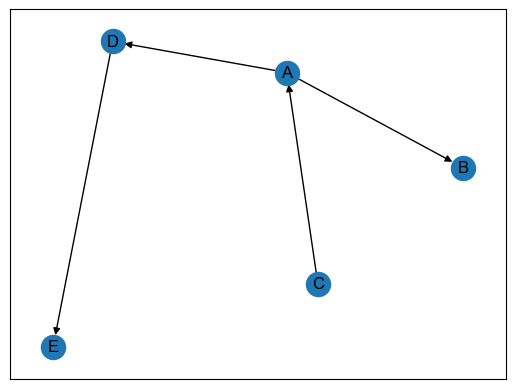

Adjacency Matrix of G2:  <Compressed Sparse Row sparse array of dtype 'int64'
	with 4 stored elements and shape (5, 5)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (2, 4)	1
  (3, 0)	1


In [33]:
# directional network
G2 = nx.DiGraph()
G2.add_edge('A', 'B')

G2.add_edge('A', 'D')
G2.add_edge('C', 'A')
G2.add_edge('D', 'E')

nx.spring_layout(G2)
nx.draw_networkx(G2)
plt.show()
print("Adjacency Matrix of G2: ", nx.adjacency_matrix(G2))

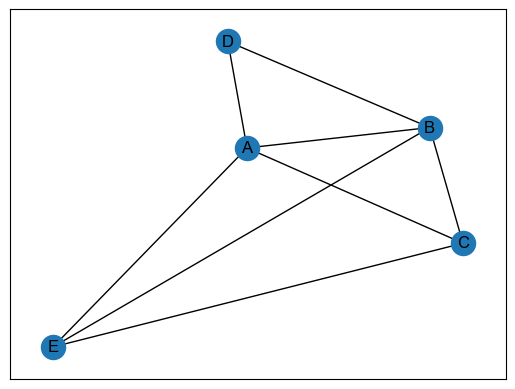

Adjacency Matrix of G3:  <Compressed Sparse Row sparse array of dtype 'int64'
	with 16 stored elements and shape (5, 5)>
  Coords	Values
  (0, 1)	25
  (0, 2)	8
  (0, 3)	11
  (0, 4)	1
  (1, 0)	25
  (1, 2)	4
  (1, 3)	7
  (1, 4)	1
  (2, 0)	8
  (2, 1)	4
  (2, 4)	1
  (3, 0)	11
  (3, 1)	7
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1


In [34]:
# weighted network
G3 = nx.Graph()
G3.add_edge('A', 'B', weight=25)
G3.add_edge('A', 'C', weight=8)
G3.add_edge('A', 'D', weight=11)
G3.add_edge('A', 'E', weight=1)
G3.add_edge('B', 'C', weight=4)
G3.add_edge('B', 'D', weight=7)
G3.add_edge('B', 'E', weight=1)
G3.add_edge('E', 'C', weight=1)
nx.spring_layout(G3)
nx.draw_networkx(G3)
plt.show()

print("Adjacency Matrix of G3: ", nx.adjacency_matrix(G3))

[[ 0. 25.  8. 11.  1.]
 [25.  0.  4.  7.  1.]
 [ 8.  4.  0.  0.  1.]
 [11.  7.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.]]


Text(0, 0.5, 'node idx')

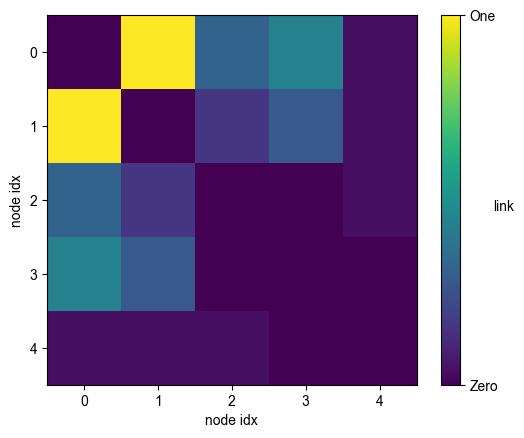

In [35]:
# Plot the Adjacency Matrix of G3
print(nx.to_numpy_array(G3))
plt.imshow(nx.to_numpy_array(G3))
cbar = plt.colorbar() #--> set colorbar heatmap annotation
cbar.set_ticks([0,25]) #--> set colorbar range of ticks
cbar.ax.set_yticklabels(['Zero','One'],) #--set colorbar y-axis label
cbar.set_label('link', rotation=0) #-set colorbar coordination label
plt.xlabel('node idx') #--set x axis
plt.ylabel('node idx') #--set y axis

In [36]:
print('Degree of A in G1：', nx.degree(G1, 'A'))
print('Clustering Coefficient of A in G1：', nx.clustering(G1, 'A')) # 2 * T(n) / deg(u) * (deg(u) - 1)
print('Short Path between A and F in G1：', nx.shortest_path(G1, 'A', 'F'))
print('Length of Short Path between D and E in G3：', nx.shortest_path_length(G3, 'D', 'E'))
print('Eccentricity of Nodes in G1：', nx.eccentricity(G1))

Degree of A in G1： 4
Clustering Coefficient of A in G1： 0.5
Short Path between A and F in G1： ['A', 'C', 'F']
Length of Short Path between D and E in G3： 2
Eccentricity of Nodes in G1： {'A': 2, 'B': 2, 'C': 2, 'D': 3, 'E': 3, 'F': 3}


# 2.Anomaly Detection

Here, we learn basic workflow and methods of anomaly detection via pyod, a python library

In [37]:
# !pip3 install pyod
# !pip3 install combo

In [38]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial']  # or another font you have
plt.rcParams['axes.unicode_minus'] = False  # so minus signs show correctly

In [39]:
# import dataset which is about the passenger flow (num_people) and order volume (num_order) of a chain retailing enterprise
# from google.colab import files
# uploaded = files.upload()

df=pd.read_csv("order_num.csv")
df

,date,num_people,num_order
0,2019-01-01,1046.0,295.0
1,2019-01-02,733.0,191.0
2,2019-01-03,695.0,222.0
3,2019-01-04,580.0,193.0
4,2019-01-05,844.0,285.0
...,...,...,...
890,2020-10-31,NaN,346.0
891,2020-11-30,NaN,204.0
892,2020-12-31,NaN,288.0
893,2021-01-31,NaN,254.0


In [40]:
# filter nan value
print("num_people has %d nan values." % df['num_people'].isnull().sum())
print("num_order has %d nan vlaues." % df['num_order'].isnull().sum())
df=df[~df.num_people.isnull()==True]
df=df[~df.num_order.isnull()==True]
print("total records nubmer after filtering:",len(df))

num_people has 58 nan values.
num_order has 35 nan vlaues.
total records nubmer after filtering: 802


count      802.000000
mean      1002.246883
std        698.302067
min          9.000000
25%        694.250000
50%        921.500000
75%       1190.500000
max      15087.000000
Name: num_people, dtype: float64

count    802.000000
mean     248.438903
std       73.424284
min        3.000000
25%      193.000000
50%      241.000000
75%      296.750000
max      588.000000
Name: num_order, dtype: float64


<Axes: xlabel='num_order', ylabel='Count'>

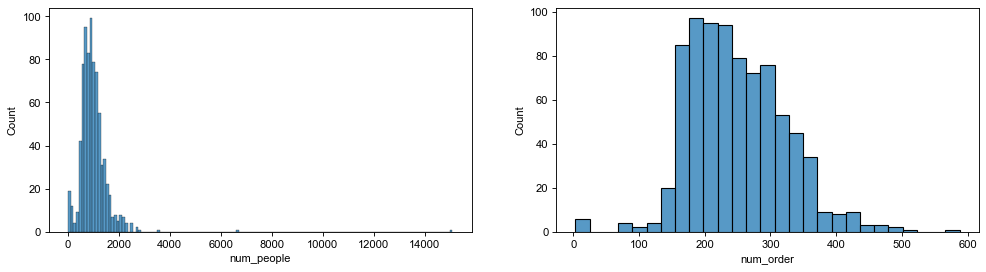

In [41]:
# data stats
print(df.num_people.describe())
print()
print(df.num_order.describe())
plt.figure(figsize=(15,8), dpi=80)
plt.subplot(221)
sns.histplot(df['num_people'])

plt.subplot(222)
sns.histplot(df['num_order'])

## IsolationForest

Core Idea: Anomalies are rare and far from other data, so they are isolated much faster than normal data points using random cuts.

Building Trees: The algorithm constructs many random trees (Isolation Trees or iTrees) by repeatedly selecting a random feature and a random split value to partition a subset of the data.

Path Length: The number of splits needed to isolate a single data point is its path length. Anomalies require a short path length; normal points require a long path length.

Scoring: An Anomaly Score is calculated based on the average path length across all trees. A score closer to 1 (shorter average path) indicates a higher likelihood of the point being an anomaly.

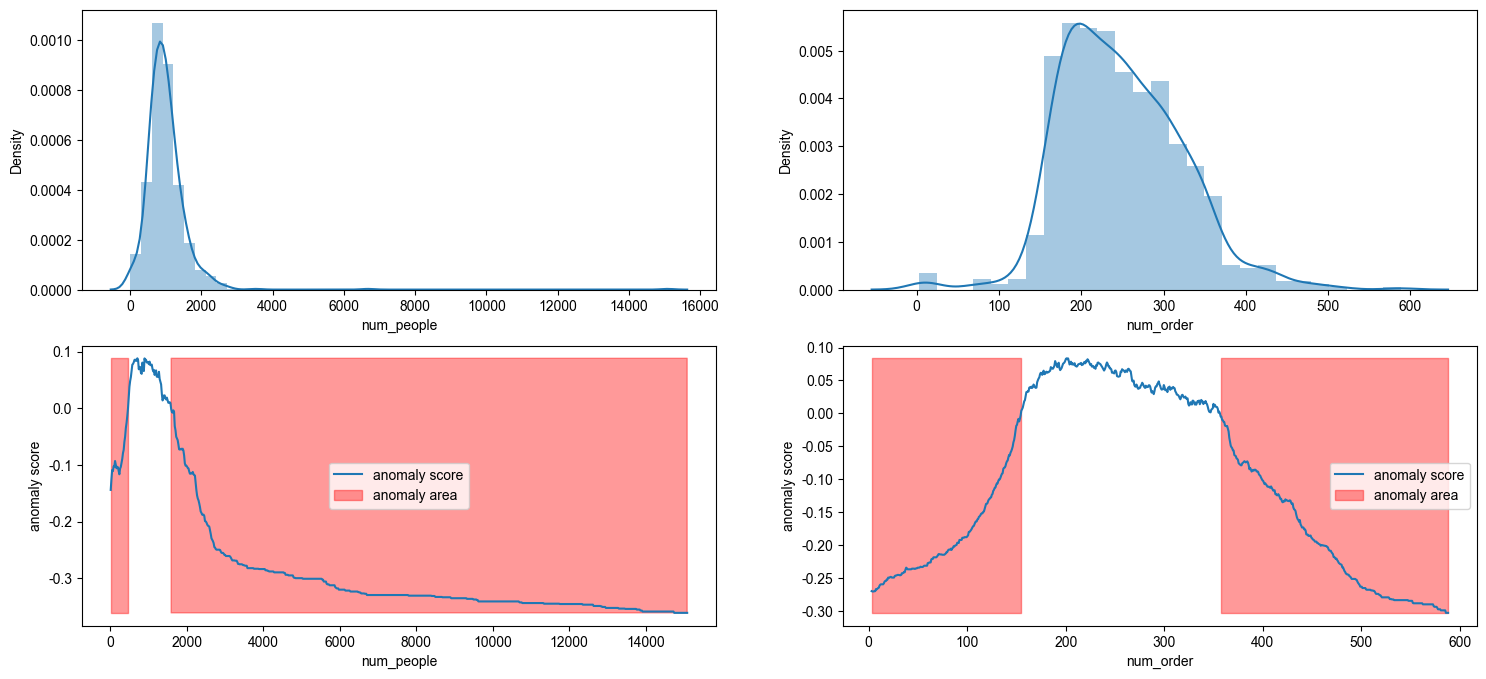

In [42]:
# define model
IF1 = IsolationForest(n_estimators=100)
# train model for num_people
IF1.fit(df['num_people'].values.reshape(-1, 1))
# split data between max num_people and min num_people
x1 = np.linspace(df['num_people'].min(), df['num_people'].max(), len(df)).reshape(-1,1)
# generate anomaly values of all data
anomaly_score1 = IF1.decision_function(x1)
# predict anomaly values
outlier1 = IF1.predict(x1)

# define a new model
IF2 = IsolationForest(n_estimators=100)
# train model for num_order
IF2.fit(df['num_order'].values.reshape(-1, 1))
# split data between max num_order and min num_order
x2 = np.linspace(df['num_order'].min(), df['num_order'].max(), len(df)).reshape(-1,1)
# generate anomaly values of all data
anomaly_score2 = IF2.decision_function(x2)
# predict anomaly values
outlier2 = IF2.predict(x2)

plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
sns.distplot(df['num_people'])

plt.subplot(2,2,2)
sns.distplot(df['num_order'])

plt.subplot(2,2,3)
plt.plot(x1, anomaly_score1, label='anomaly score')
plt.fill_between(x1.T[0], np.min(anomaly_score1), np.max(anomaly_score1),
                 where=outlier1==-1, color='r',
                 alpha=.4, label='anomaly area')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('num_people')

plt.subplot(2,2,4)
plt.plot(x2, anomaly_score2, label='anomaly score')
plt.fill_between(x2.T[0], np.min(anomaly_score2), np.max(anomaly_score2),
                 where=outlier2==-1, color='r',
                 alpha=.4, label='anomaly area')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('num_order')
plt.show();

In the figure above, the Isolation Forest algorithm easily detects the outlier areas of passenger flow (num_people) and order volume (num_order), and generates a score curve. When the data falls within the red rectangle, it will get a score below 0 (indicating anomaly), and when the data falls outside the red rectangle, it will get a score above 0 (indicating normality).

More methods:
Feature Bagging

Histogram-base Outlier Detection (HBOS)

Isolation Forest

K Nearest Neighbors (KNN)

Local Outlier Factor (LOF)

One-class SVM (OCSVM)

Principal Component Analysis (PCA)


### Practice

In [43]:
# for 1D and 2D data points, you can eyeball the scatter plot for a quick check 

In [44]:
# Choose one or two methods to try, similarly to Isolation Forest
